# Task

<p>
For this project, we've collected information on approximately 4,000 apartments in Tehran. All the data provided are entirely real. Your task is to estimate the price in dollars or Tomans using the dataset's features described below. The data is stored in the file housePrice.csv.
</p>

* Area of the apartment in square meters (Area)
* Number of bedrooms (Room)
* Parking availability (Parking)
* Warehouse/storage availability (Warehouse)
* Elevator availability (Elevator)
* Approximate address in Tehran (Address)
* Price in Tomans (Price)
* Price in USD (Price(USD))

<p>
In this dataset, some apartments have missing addresses, and some have incorrect area values (excessively large values). You must manage these cases by removing them from your dataset.
</p>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reas CSV File
* Read as dataframe
* Convert Area, Room, Prices to number

In [71]:
df = pd.read_csv("./resources/housePrice.csv")

df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Room'] = pd.to_numeric(df['Room'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price(USD)'] = pd.to_numeric(df['Price(USD)'], errors='coerce')

In [72]:
df.count()

Area          3473
Room          3479
Parking       3479
Warehouse     3479
Elevator      3479
Address       3456
Price         3479
Price(USD)    3479
dtype: int64

## Clean Data
* Filter empty address
* Filter invalid area value

In [73]:
df = df[df['Address'].notna() & (df['Address'].str.strip() != '')]
df = df[(df['Area'] >= 1) & (df['Area'] <= 10000)]
df.reset_index(drop=True, inplace=True)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [74]:
df.count()

Area          3450
Room          3450
Parking       3450
Warehouse     3450
Elevator      3450
Address       3450
Price         3450
Price(USD)    3450
dtype: int64

## Mask Data
* Train data
* Test data

In [75]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

## Separated Room Scatter

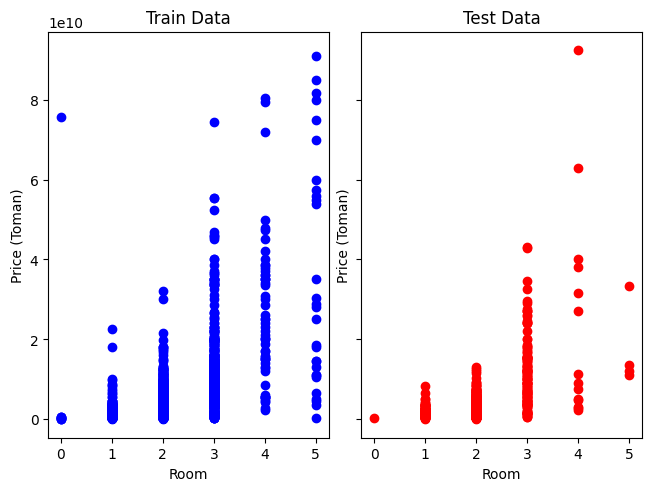

In [76]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, layout="constrained")

scatter1 = axs[0].scatter(train.Room, train.Price, color='blue')
axs[0].set_title('Train Data')
axs[0].set_xlabel('Room')
axs[0].set_ylabel('Price (Toman)')

scatter2 = axs[1].scatter(test.Room, test.Price, color='red')
axs[1].set_title('Test Data')
axs[1].set_xlabel('Room')
axs[1].set_ylabel('Price (Toman)')

plt.show()

## Room Scatter

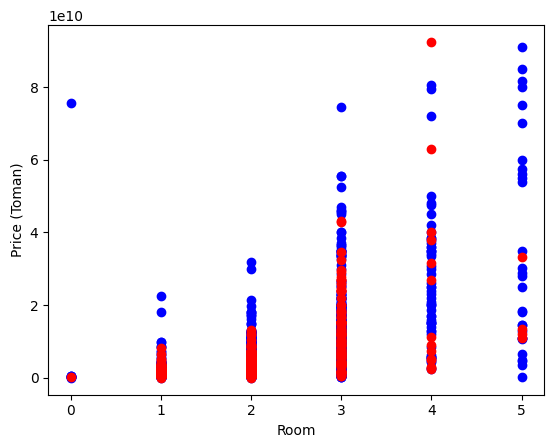

In [77]:
fig = plt.figure()
axs = fig.add_subplot(1,1,1)
axs.scatter(train.Room, train.Price, color='blue')
axs.scatter(test.Room, test.Price, color='red')
plt.xlabel("Room")
plt.ylabel("Price (Toman)")
plt.show()

## Linear Regression of Room

In [78]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Room"]])
train_y = np.asanyarray(train[["Price"]])
regr.fit(train_x, train_y)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficient:  [[6.19614591e+09]]
Intercept:  [-7.42524247e+09]


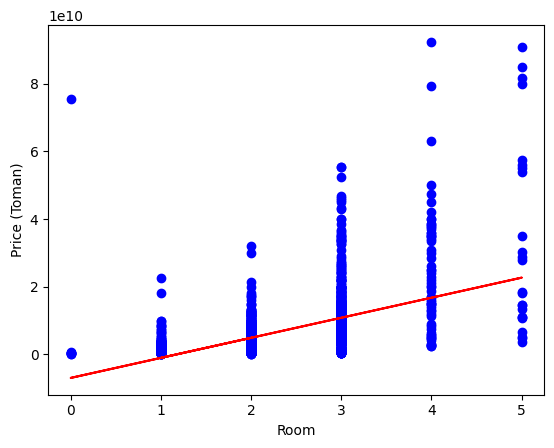

In [67]:
plt.scatter(train.Room, train.Price, color="blue")
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], "-r")
plt.xlabel("Room")
plt.ylabel("Price (Toman)")
plt.show()

## Predict on Room

In [80]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[["Room"]])
test_y = np.asanyarray(test[["Price"]])
test_y_hat = regr.predict(test_x)

print("Error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Mean: %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("Score: %.2f" % r2_score(test_y, test_y_hat))

Error: 3909513623.78
Mean: 37198332464817643520.00
Score: 0.29
